In [1]:
import pandas as pd
import numpy as np
from scipy import stats as stats
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
import KeyFunctions as me
import skopt as skopt
import warnings

warnings.filterwarnings("ignore", message="The objective has been evaluated at this point before.")

RandState = 117
cv = 5

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(5, shuffle = True)

#Import Full R6g Dataset
df, labels = me.ConstructCombinedChlorDataset()

display(df)

[train, test] = train_test_split(df, random_state = RandState, shuffle = True, train_size = 0.8)

y_tn = train.index
y_tt = test.index
X_tt = test.to_numpy()
X_tn = train.to_numpy()
display(labels)

,1678.85449,1677.17090,1675.48731,1673.80371,1672.11816,1670.43359,1668.74805,1667.06152,1665.37598,1663.68848,...,568.96094,566.97852,564.99512,563.01172,561.02734,559.04297,557.05762,555.07227,553.08594,551.09863
10-3,666.101680,1192.496020,-94.743570,883.357250,2721.766440,2694.281030,2186.666570,2366.031350,2947.078070,3347.422490,...,3065.490850,3544.981010,4708.018430,5089.640290,4897.324470,6114.053030,6345.150530,4486.768180,4288.469730,1074.278860
10-3,-247.566080,395.544230,-384.477700,-566.306990,353.431230,571.135390,1228.369910,435.173130,1128.652530,963.096940,...,3770.205390,5010.376800,6666.395180,6399.634830,7213.809260,7548.426780,7401.443790,6464.263480,4864.775280,2725.158670
10-3,441.036980,1490.725110,425.839250,1275.839040,2838.552280,2854.098370,2929.446480,2564.716200,3631.585700,4251.506400,...,9658.454330,12203.081990,13223.743860,14469.664490,14219.069330,15202.391050,13506.380420,12439.915580,9187.376050,4274.958080
10-3,-877.818940,-518.389250,-1200.313510,-422.619580,-390.496750,805.270970,436.387910,161.344640,770.774260,1150.353240,...,7112.516820,9841.571010,10267.432340,9346.157930,8865.799530,9375.781950,9010.280000,7210.127170,5493.819550,2244.233860
10-3,532.644670,765.791770,321.264040,320.417940,1035.805770,1283.079740,1411.413400,1821.770050,2310.421000,2341.390580,...,3543.602430,5004.805610,6328.873120,6923.038320,7291.950510,8421.658640,7527.081090,6528.732890,5523.430960,2098.028440
10-4,676.599040,826.342630,206.039790,2020.759020,2041.222280,1576.894580,2289.853260,2037.682390,3327.802480,2837.299090,...,2290.361230,4610.508780,4717.694140,4669.205070,6183.826650,6546.862540,6307.319080,4760.196580,4353.393610,3230.710500
10-4,875.148650,1518.026880,626.034820,1513.526570,1677.934670,1869.686000,2290.435580,2002.937190,2095.665090,2202.564610,...,2947.959290,3892.990470,4399.384590,4948.121890,5061.120220,5213.267560,5048.033220,4422.253340,3344.436060,1671.984790
10-4,367.178940,-77.868710,-176.804520,86.763650,67.605760,109.776060,-32.520200,-176.355200,413.050030,280.877840,...,1932.533980,3750.507910,4553.691810,5274.335730,5673.256630,6123.365270,5465.292150,4218.305760,2748.999120,1198.133040
10-4,1461.299230,1977.020410,1288.604280,1616.704680,1748.345050,2605.294360,2270.971570,2646.958680,2960.405500,2867.737010,...,1984.203910,3382.529160,3213.782020,3425.024920,3443.004520,3997.393240,3563.211610,2450.475540,2228.401690,806.653320
10-4,664.401470,1231.610720,701.028870,672.346260,1430.472670,2320.322800,2547.361200,1361.466830,2407.255420,2251.026130,...,2709.677460,4498.599580,5149.642650,5929.750610,6483.360030,7204.210150,7078.870510,5998.871170,4174.278270,1512.719630


['10-3', '10-4', '10-5', '10-6', '10-7']

In [3]:
#Scale Dataset

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

Scale = StandardScaler()

X_tn = Scale.fit_transform(X_tn)
X_tt = Scale.transform(X_tt)

In [4]:
#Calculate Cross Validation Scores
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

df.columns = df.columns.astype(str)

RFC = RandomForestClassifier(random_state = RandState)

RFCscore = cross_val_score(RFC, X_tn, y_tn, cv = cv)
display("Random Forest Cross Validation")
display(RFCscore)
display(np.mean(RFCscore))

RFcv = cross_validate(RFC, X_tn, y_tn, cv = cv)
display(np.mean(RFcv['fit_time']))

'Random Forest Cross Validation'

array([0.875, 0.875, 1.   , 0.875, 1.   ])

0.925

0.11441965103149414

In [5]:
params = dict()
params['n_estimators'] = (10, 200, 'log-uniform')
params['max_features'] = (10, np.shape(X_tn)[1], 'log-uniform')
params['criterion'] = ['gini', 'entropy']

Bayes = skopt.BayesSearchCV(RFC, search_spaces = params, n_jobs = 6,
                      return_train_score = True, random_state = RandState, cv = cv)
RFBS = Bayes.fit(X_tn, y_tn)
RFC = RFBS.best_estimator_
SC_RFC = RFC.fit(X_tn, y_tn)

display(RFBS.best_params_)
display(RFBS.best_score_)
display(RFBS.cv_results_['std_test_score'][RFBS.best_index_])
display(RFBS.refit_time_)

OrderedDict([('criterion', 'gini'),
             ('max_features', 618),
             ('n_estimators', 159)])

0.975

0.049999999999999996

0.6416409015655518

In [6]:
from sklearn.metrics import confusion_matrix
y_pred = RFBS.predict(X_tt)

RFcounter = 0

for i in range(len(y_tt)):
    if y_pred[i] != y_tt[i]:
        display("Incorrect Prediction at " + str(i) + ", Predicted: "+ str(y_pred[i]) + "; Actual: " + str(y_tt[i]))
        RFcounter += 1
                
display("Total Predictions: " + str(i))
display("Total Errors: " + str(RFcounter))

CMNT = confusion_matrix(y_tt, y_pred, labels = labels)

'Total Predictions: 9'

'Total Errors: 0'

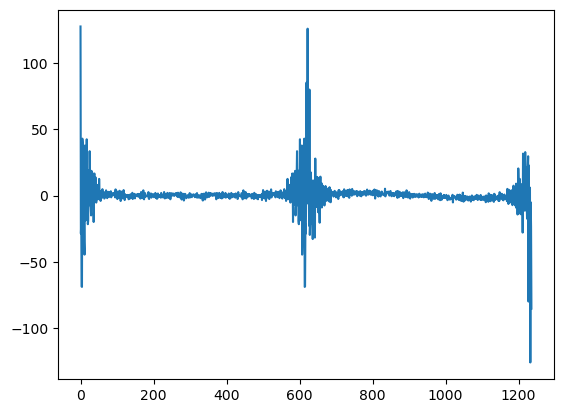

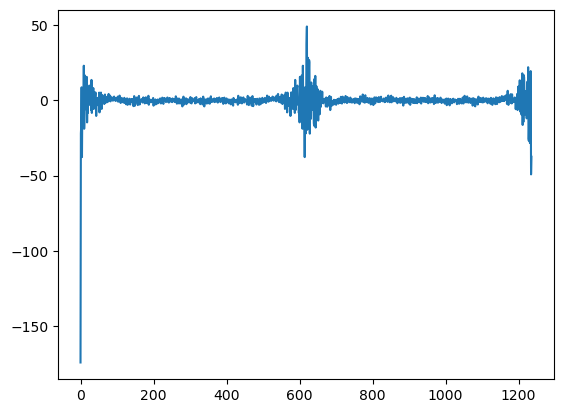

In [7]:
#Apply Fourier Transform to Training and Testing Data
#Fourier Transform Performs Best Without Scaling

X_tt = test.to_numpy()
X_tn = train.to_numpy()

Scale = StandardScaler()

X_tn = Scale.fit_transform(X_tn)
X_tt = Scale.transform(X_tt)

X_tnf = np.fft.fft(X_tn)
X_ttf = np.fft.fft(X_tt)

#Data is stored as columns of all real values followed by columns of all imaginary values.
X_tnf = np.append(np.real(X_tnf), np.imag(X_tnf), axis = 1)
X_ttf = np.append(np.real(X_ttf), np.imag(X_ttf), axis = 1)

plt.figure()
plt.plot(X_tnf[1, :])
plt.figure()
plt.plot(X_tnf[7, :]);

In [8]:
#Calculate Cross Validation Scores
from sklearn.model_selection import cross_val_score

df.columns = df.columns.astype(str)

RFC = RandomForestClassifier(random_state = RandState)

RFCscore = cross_val_score(RFC, X_tnf, y_tn, cv = cv)
display("Random Forest Cross Validation")
display(RFCscore)
display(np.mean(RFCscore))

RFcv = cross_validate(RFC, X_tnf, y_tn, cv = cv)
display(np.mean(RFcv['fit_time']))

'Random Forest Cross Validation'

array([0.25, 0.5 , 0.75, 0.5 , 0.25])

0.45

0.1409453868865967

In [9]:
params = dict()
params['n_estimators'] = (10, 200, 'log-uniform')
params['max_features'] = (10, np.shape(X_tnf)[1], 'log-uniform')
params['criterion'] = ['gini', 'entropy']

Bayes = skopt.BayesSearchCV(RFC, search_spaces = params, n_jobs = 6,
                      return_train_score = True, random_state = RandState, cv = cv)
RFBS = Bayes.fit(X_tnf, y_tn)
RFC = RFBS.best_estimator_
FT_RFC = RFC.fit(X_tnf, y_tn)

display(RFBS.best_params_)
display(RFBS.best_score_)
display(RFBS.cv_results_['std_test_score'][RFBS.best_index_])
display(RFBS.refit_time_)

OrderedDict([('criterion', 'entropy'),
             ('max_features', 1078),
             ('n_estimators', 200)])

0.575

0.1695582495781317

2.732572317123413

In [10]:
y_pred = RFBS.predict(X_ttf)

RFcounter = 0

for i in range(len(y_tt)):
    if y_pred[i] != y_tt[i]:
        display("Incorrect Prediction at " + str(i) + ", Predicted: "+ str(y_pred[i]) + "; Actual: " + str(y_tt[i]))
        RFcounter += 1
                
display("Total Predictions: " + str(i))
display("Total Errors: " + str(RFcounter))

CMFT = confusion_matrix(y_tt, y_pred, labels = labels)

'Incorrect Prediction at 1, Predicted: 10-6; Actual: 10-5'

'Incorrect Prediction at 9, Predicted: 10-3; Actual: 10-7'

'Total Predictions: 9'

'Total Errors: 2'

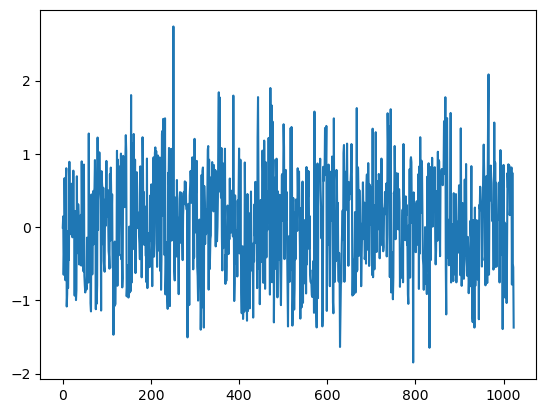

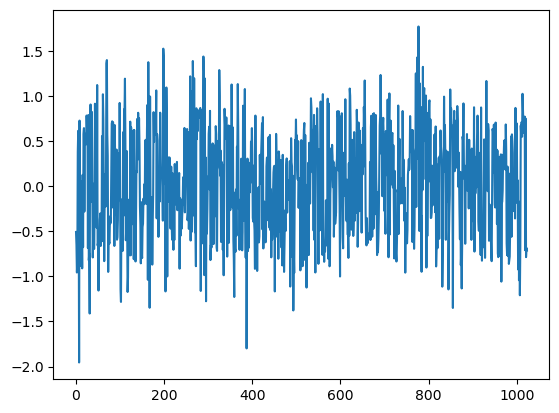

In [11]:
#Apply Welsh-Hadamard Transform to Training and Testing Data
from sympy.discrete.transforms import fwht, ifwht
X_tt = test.to_numpy()
X_tn = train.to_numpy()

X_tnh = np.apply_along_axis(fwht, axis=1, arr=X_tn)
X_tth = np.apply_along_axis(fwht, axis=1, arr=X_tt)

Scale = StandardScaler()

X_tnh = Scale.fit_transform(X_tnh)
X_tth = Scale.transform(X_tth)

plt.figure()
plt.plot(X_tnh[1, :])
plt.figure()
plt.plot(X_tnh[7, :]);

In [12]:
#Calculate Cross Validation Scores
from sklearn.model_selection import cross_val_score

df.columns = df.columns.astype(str)

RFC = RandomForestClassifier(random_state = RandState)

RFCscore = cross_val_score(RFC, X_tnh, y_tn, cv = cv)
display("Random Forest Cross Validation")
display(RFCscore)
display(np.mean(RFCscore))

RFcv = cross_validate(RFC, X_tnh, y_tn, cv = cv)
display(np.mean(RFcv['fit_time']))

'Random Forest Cross Validation'

array([0.625, 0.625, 0.75 , 0.75 , 0.625])

0.675

0.1312934398651123

In [13]:
params = dict()
params['n_estimators'] = (10, 200, 'log-uniform')
params['max_features'] = (10, np.shape(X_tnh)[1], 'log-uniform')
params['criterion'] = ['gini', 'entropy']

Bayes = skopt.BayesSearchCV(RFC, search_spaces = params, n_jobs = 6,
                      return_train_score = True, random_state = RandState, cv = cv)
RFBS = Bayes.fit(X_tnh, y_tn)
RFC = RFBS.best_estimator_
HT_RFC = RFC.fit(X_tnh, y_tn)

display(RFBS.best_params_)
display(RFBS.best_score_)
display(RFBS.cv_results_['std_test_score'][RFBS.best_index_])
display(RFBS.refit_time_)

OrderedDict([('criterion', 'gini'),
             ('max_features', 254),
             ('n_estimators', 74)])

0.775

0.1224744871391589

0.1729283332824707

In [14]:
y_pred = RFBS.predict(X_tth)

RFcounter = 0

for i in range(len(y_tt)):
    if y_pred[i] != y_tt[i]:
        display("Incorrect Prediction at " + str(i) + ", Predicted: "+ str(y_pred[i]) + "; Actual: " + str(y_tt[i]))
        RFcounter += 1
                
display("Total Predictions: " + str(i))
display("Total Errors: " + str(RFcounter))

CMHT = confusion_matrix(y_tt, y_pred, labels = labels)

'Incorrect Prediction at 1, Predicted: 10-6; Actual: 10-5'

'Incorrect Prediction at 5, Predicted: 10-5; Actual: 10-7'

'Incorrect Prediction at 6, Predicted: 10-5; Actual: 10-6'

'Incorrect Prediction at 7, Predicted: 10-3; Actual: 10-4'

'Total Predictions: 9'

'Total Errors: 4'

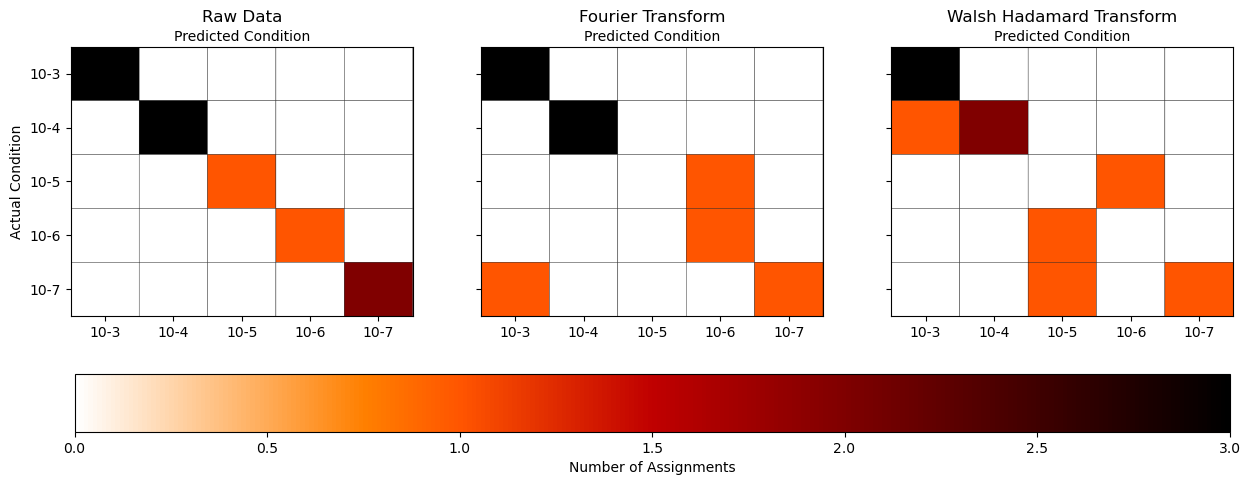

In [15]:

fig, axs = plt.subplots(1, 3, sharey = True, figsize = [15, 5])

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

pcm = axs[0].pcolor(CMNT, edgecolors = 'k', cmap = 'gist_heat_r')
plt.gca().invert_yaxis()
axs[0].set_xticks(ticks = np.linspace(0.5, len(labels)-0.5, num = len(labels)), labels = labels)
axs[0].set_yticks(ticks = np.linspace(0.5, len(labels)-0.5, num = len(labels)), labels = labels)
axs[0].set_ylabel("Actual Condition")
axs[0].set_xlabel("Predicted Condition")
axs[0].xaxis.set_label_position('top') 
axs[0].set_title('Raw Data');

axs[1].pcolor(CMFT, edgecolors = 'k', cmap = 'gist_heat_r');
plt.gca().invert_yaxis()
axs[1].set_xticks(ticks = np.linspace(0.5, len(labels)-0.5, num = len(labels)), labels = labels)
axs[1].set_title('Fourier Transform');
axs[1].set_xlabel("Predicted Condition")
axs[1].xaxis.set_label_position('top')

axs[2].pcolor(CMHT, edgecolors = 'k', cmap = 'gist_heat_r')
plt.gca().invert_yaxis()
axs[2].set_xticks(ticks = np.linspace(0.5, len(labels)-0.5, num = len(labels)), labels = labels);
axs[2].set_title('Walsh Hadamard Transform');
axs[2].set_xlabel("Predicted Condition")
axs[2].xaxis.set_label_position('top')

fig.colorbar(pcm, ax = axs[:], location = 'bottom', label = 'Number of Assignments');

In [16]:
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

C:\Users\jayapra1\Anaconda3\envs\Base\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


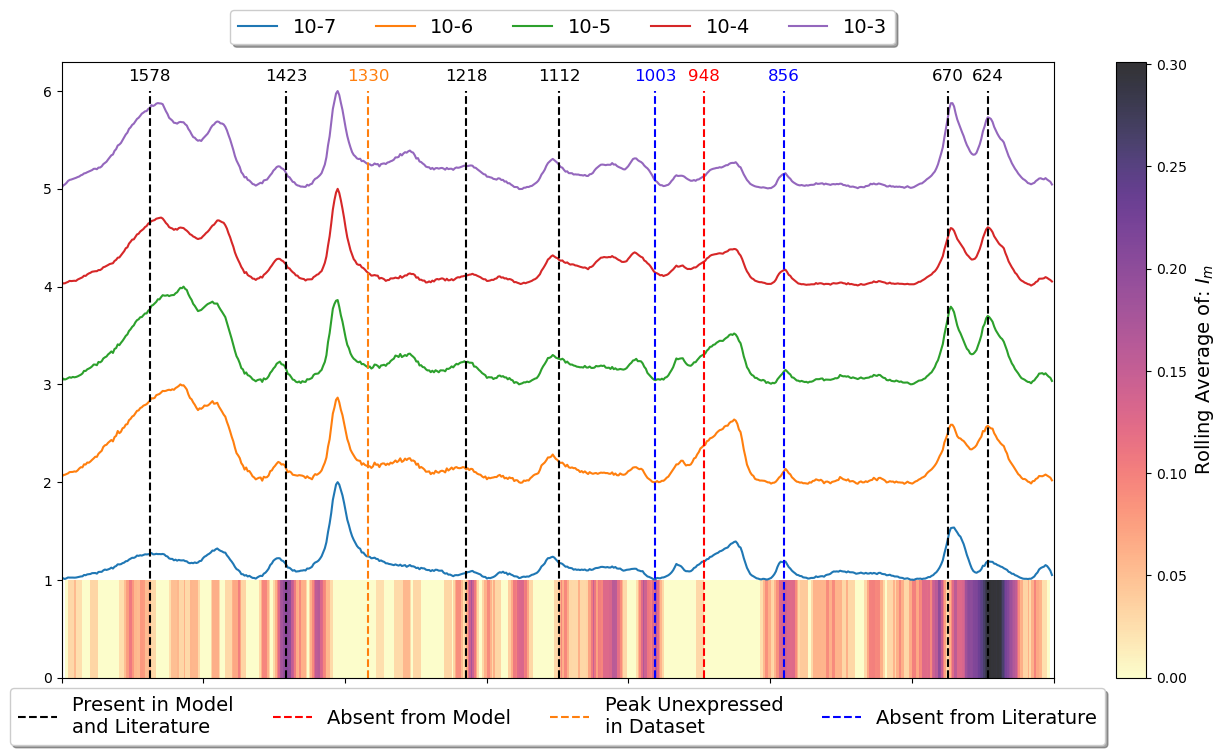

In [50]:
import matplotlib.colors as c
import matplotlib.ticker as mticker


fig = plt.figure(figsize = [16, 8])
ax = plt.gca()
SC_imp = pd.Series(SC_RFC.feature_importances_)
FT_imp = pd.Series(FT_RFC.feature_importances_)
HT_imp = pd.Series(HT_RFC.feature_importances_)

#Calculate Average Spectra for Each Concentration
df_avg = pd.DataFrame(columns = df.columns)
concs = df.index.unique().tolist()
concs.sort(key = lambda x: int(x.split('-', 1)[-1]), reverse = True)
for ind in concs:
    df_avg.loc[ind, :] = df.loc[df.index[:] == ind].mean(axis = 0)
    
    
#Determine Maxima Based on First Spectra in Each Concnetration Level
mx_graph = 0
for ind, row in df_avg.iterrows():
        if max(row) > mx_graph:
            mx_graph = max(row)

#Scale Each First Spectra to [0,1] Based on Maxima
offset= 1 
for ind, row in df_avg.iterrows():
        row = row/max(row) + offset
        ax.plot(row)
        offset += 1

ticks_loc = np.linspace(0, np.shape(df)[1], 8)
ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ticklbls = np.linspace(max(df.columns.astype(float)), min(df.columns.astype(float)), 8)
ticklbls = np.round(ticklbls)
ax.set_xticklabels(ticklbls)

#Indicate 10 Most Important Peaks with Dashed Lines
SC_imp.sort_values(ascending = False, inplace = True)
SC_keypeaks = SC_imp.iloc[0:10]
kp_lbls = df.columns[SC_keypeaks.index].values
#ax.vlines(SC_keypeaks.index, ymin = 0, ymax= 1, color = 'k', linestyle = 'dashed', label = 'Highest Importance Peaks')

#Annotate Lines
for ind, val in np.ndenumerate(kp_lbls):
    x = SC_keypeaks.index[ind[0]]
    val = str(round(float(val)))
    #ax.annotate(val, xy = (x, 1-ind[0]*0.05))

X = SC_imp.index.values
Y = np.linspace(0, 1, 1)
Z = np.zeros((len(Y), len(X)))

SC_imp_raw = SC_imp.copy()
SC_imp = abs(1/np.log(SC_imp))
SC_imp = SC_imp.sort_index().rolling(5, center = True).mean()

for index, value in SC_imp.items():
    Z[:, index] = value
    
plt.pcolormesh(Z, cmap = 'magma_r', alpha = 0.8)
cb = plt.colorbar()
cb.set_label('Rolling Average of: ' + r'$I_m$', fontsize =14)


wavelbls =  np.linspace(max(df_avg.columns.astype(float)), min(df_avg.columns.astype(float)), len(df.columns))
wavelbls = np.ndarray.astype(np.ndarray.astype(np.round(wavelbls), int), str)
islbls = SC_imp.round(3).astype(str)

anno1 = ax.vlines(577, ymin = 0, ymax= 6, color = 'k', linestyle = 'dashed')
ax.annotate(wavelbls[577], xy = (577, 6.1), fontsize = 'large', ha = 'center');

ax.vlines(552, ymin = 0, ymax= 6, color = 'k', linestyle = 'dashed')
ax.annotate(wavelbls[552], xy = (552, 6.1), fontsize = 'large', ha = 'center');

ax.vlines(310, ymin = 0, ymax= 6, color = 'k', linestyle = 'dashed');
ax.annotate(wavelbls[310], xy = (310, 6.1), fontsize = 'large', color = 'k', ha = 'center');

ax.vlines(252, ymin = 0, ymax= 6, color = 'k', linestyle = 'dashed')
ax.annotate(wavelbls[252], xy = (252, 6.1), fontsize = 'large', color = 'k', ha = 'center');

ax.vlines(140, ymin = 0, ymax= 6, color = 'k', linestyle = 'dashed');
ax.annotate(wavelbls[140], xy = (140, 6.1), fontsize = 'large', color = 'k', ha = 'center');

ax.vlines(55, ymin = 0, ymax= 6, color = 'k', linestyle = 'dashed')
ax.annotate(wavelbls[55], xy = (55, 6.1), fontsize = 'large', ha = 'center');


anno2 = ax.vlines(400, ymin = 0, ymax= 6, color = 'r', linestyle = 'dashed')
ax.annotate(wavelbls[400], xy = (400, 6.1), fontsize = 'large', color = 'r', ha = 'center');


anno3 =ax.vlines(191, ymin = 0, ymax= 6, color = 'tab:orange', linestyle = 'dashed')
ax.annotate(wavelbls[191], xy = (191, 6.1), fontsize = 'large', color = 'tab:orange', ha = 'center')


anno4 = ax.vlines(370, ymin = 0, ymax= 6, color = 'b', linestyle = 'dashed');
ax.annotate(wavelbls[370], xy = (370, 6.1), fontsize = 'large', color = 'b', ha = 'center');

ax.vlines(450, ymin = 0, ymax= 6, color = 'b', linestyle = 'dashed');
ax.annotate(wavelbls[450], xy = (450, 6.1), fontsize = 'large', color = 'b', ha = 'center');



anno_legend = plt.legend(handles = [anno1, anno2, anno3, anno4], loc=8, ncol= 4, bbox_to_anchor = (0.25, -.125, 0.5, 0.5), \
                         fontsize = 14, labels = ['Present in Model\nand Literature', 'Absent from Model',\
                                   'Peak Unexpressed\nin Dataset', 'Absent from Literature'], fancybox = True, shadow = True)

ax.legend(df_avg.index, bbox_to_anchor = (0.35, 0.6, 0.5, 0.5), ncol = len(df_avg.index)+3, fontsize = 14,\
                                    fancybox = True, shadow = True)
plt.gca().add_artist(anno_legend)

plt.savefig("G:/My Drive/MITACs/Finalized Code and Data/Tables and Figures/SVG Files/Chlor Peak Identification.svg", format = "svg", bbox_inches='tight')
plt.savefig("G:/My Drive/MITACs/Finalized Code and Data/Tables and Figures/PNG Files/Chlor Peak Identification.png", format = "png", bbox_inches='tight')

#Peak Identification Source
#https://link.springer.com/article/10.1007/s00217-019-03408-8